# CAPSTONE 1 -  MACHINE LEARNING MODELS

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Machine modeling
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN

# Scores
from sklearn import metrics
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, confusion_matrix

#### Import data variables

In [42]:
 X = pd.read_csv('Data/X.csv')         ## X data - features
Y1 = pd.read_csv('Data/Y1.csv')       ## Y data - Target 'class' 
Y = np.ravel(Y1)

#### Create train-test split with stratisfied target data - target data is minority class that will be resampled during fit.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, 
                                                stratify=Y,random_state = 88)

#### Function: Scale - Resample - Grid Search across multiple parameters - return best parameters, ROC graph and scores

In [112]:
def gridSearchCV(model, param_grid, X_train, X_Test, y_train, y_test, graph = 1):
    std_scale = StandardScaler()
    X_train_scaled = std_scale.fit_transform(X_train)
    X_test_scaled = std_scale.transform(X_test)
    adasyn = ADASYN(random_state=88)
    X_adasyn, y_adasyn = adasyn.fit_resample(X_train_scaled, y_train)
    pipeline = Pipeline([('sampling', adasyn), ('class', model)])
    grid = GridSearchCV(model, param_grid, scoring = 'f1', cv = 5) 
    grid.fit(X_train_scaled, y_train)
    predictions = grid.predict(X_test_scaled)
    print(model)
    print(classification_report(y_test, predictions))
    plot_ROC(grid, predictions, X_test_scaled, y_test, graph=graph)
    print("Best Parameters: ", grid.best_params_)

In [119]:
def plot_ROC(model,probs, test_features, test_target, graph = 1):
    if graph == 1:
        print("area under curve (auc): ", metrics.roc_auc_score(y_test, probs))
        fpr, tpr, thresholds = roc_curve(test_target, probs)
        plt.plot([0,1],[0,1], linestyle='--')
        plt.plot(fpr, tpr)
        plt.show()
        
    plot_confusion(test_target, probs)

In [120]:
def plot_confusion(y_test, pred):
    mat = confusion_matrix(y_test, pred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label');

### LOGISTIC REGRESSION

LogisticRegression(random_state=42)
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.81      0.87      0.84        30

    accuracy                           0.89        93
   macro avg       0.87      0.89      0.88        93
weighted avg       0.90      0.89      0.89        93

area under curve (auc):  0.8857142857142857


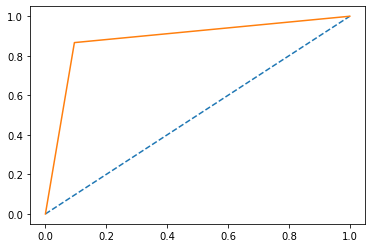

Best Parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


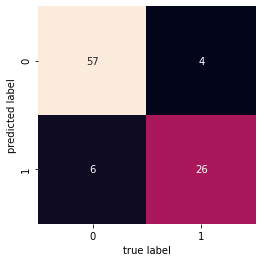

In [128]:
# Test parameter grid for best paramaters
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
penalty = ['l2']
c_values = [0.001,0.01,0.1, 1, 10]
random_grid = {'solver':solvers,'penalty':penalty,'C':c_values}

# Perform GridSearch on parameter grid
gridSearchCV(LogisticRegression(random_state=42), random_grid, X_train, X_test, y_train, y_test)

## GRADIENT BOOSTING CLASSIFIER

GradientBoostingClassifier(random_state=42)
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.81      0.87      0.84        30

    accuracy                           0.89        93
   macro avg       0.87      0.89      0.88        93
weighted avg       0.90      0.89      0.89        93

area under curve (auc):  0.8857142857142857


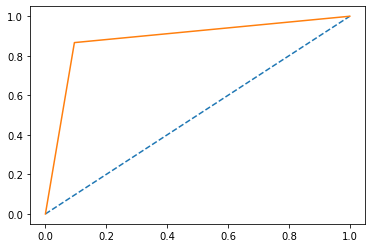

Best Parameters:  {'criterion': 'friedman_mse', 'learning_rate': 0.5, 'loss': 'deviance', 'n_estimators': 16}


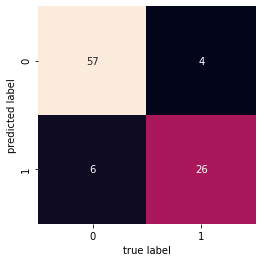

In [122]:
# Test parameter grid for best paramaters
loss = ['deviance', 'exponential']
lr = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
ne = range(1,100,5)
cr = ['friedman_mse', 'mse', 'mae']
random_grid = {'loss':loss,'learning_rate':lr,'n_estimators':ne, 'criterion':cr}

# Perform GridSearch on parameter grid
gridSearchCV(GradientBoostingClassifier(random_state=42), random_grid, X_train, X_test, y_train, y_test)

### Support Vector Machine

####  parameter tuning

SVC(random_state=42)
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        63
           1       0.80      0.80      0.80        30

    accuracy                           0.87        93
   macro avg       0.85      0.85      0.85        93
weighted avg       0.87      0.87      0.87        93

area under curve (auc):  0.8523809523809524


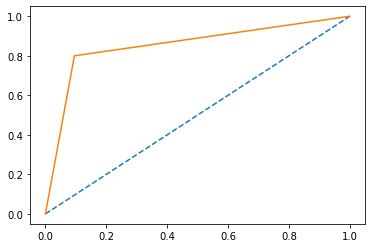

Best Parameters:  {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


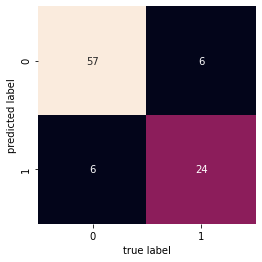

In [123]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

gridSearchCV(SVC(random_state=42), param_grid, X_train, X_test, y_train, y_test)

### Random Forest Classifier

RandomForestClassifier(random_state=42)
              precision    recall  f1-score   support

           0       0.88      0.95      0.92        63
           1       0.88      0.73      0.80        30

    accuracy                           0.88        93
   macro avg       0.88      0.84      0.86        93
weighted avg       0.88      0.88      0.88        93

area under curve (auc):  0.8428571428571429


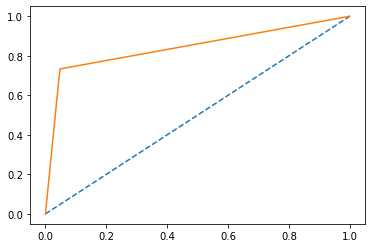

Best Parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'n_estimators': 8}


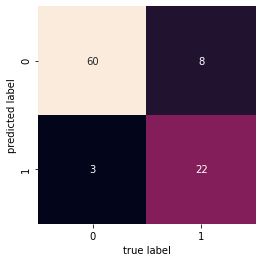

In [124]:
param_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200], 
              'max_depth': range(1,32,1),
              'min_samples_leaf': [1, 2, 3, 4, 5], 
              'criterion': ['gini', 'entropy']}  

gridSearchCV(RandomForestClassifier(random_state=42), param_grid, X_train, X_test, y_train, y_test)

### KNeighborsClassifier

In [125]:
lr = KNeighborsClassifier()
print(lr.get_params().keys())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])


#### Base Measure without tuning

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        63
           1       0.82      0.77      0.79        30

    accuracy                           0.87        93
   macro avg       0.86      0.84      0.85        93
weighted avg       0.87      0.87      0.87        93

area under curve (auc):  0.8436507936507938


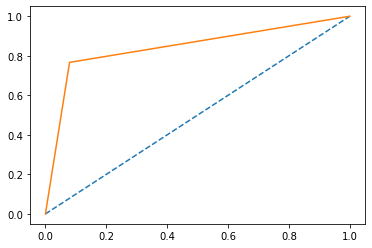

Best Parameters:  {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}


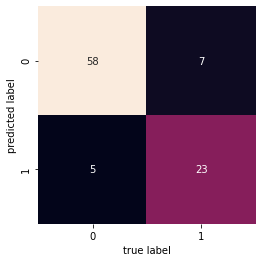

In [126]:
param_grid = {'algorithm': ['auto'], 
              'leaf_size': [1,5,10,15,20,25,30], 
             'n_neighbors':[1,2,3,4,5,6,7,8],
             'p':[1,2],
             'weights':['uniform','distance']}  

gridSearchCV(KNeighborsClassifier(), param_grid, X_train, X_test, y_train, y_test)

### Gaussian Naive Bayes

GaussianNB()
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        63
           1       0.68      0.83      0.75        30

    accuracy                           0.82        93
   macro avg       0.79      0.82      0.80        93
weighted avg       0.83      0.82      0.82        93

area under curve (auc):  0.8214285714285714


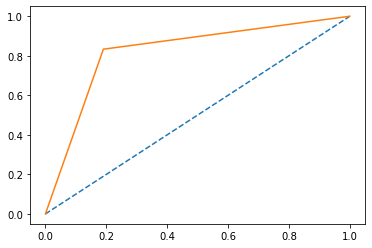

Best Parameters:  {'var_smoothing': 1e-09}


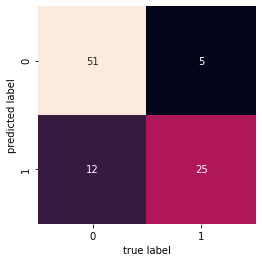

In [127]:
param_grid = {'var_smoothing':[1e-1,1e-9,1e-19,1e-29]}
gridSearchCV(GaussianNB(priors=None, ), param_grid, X_train, X_test, y_train, y_test)